In [176]:
import pandas as pd ,numpy as np

import warnings
warnings.filterwarnings('ignore')

In [177]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [178]:
df.shape

(200, 4)

In [179]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [180]:
df.duplicated().sum()

0

In [181]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [182]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [183]:
import matplotlib.pyplot as plt ,seaborn as sns

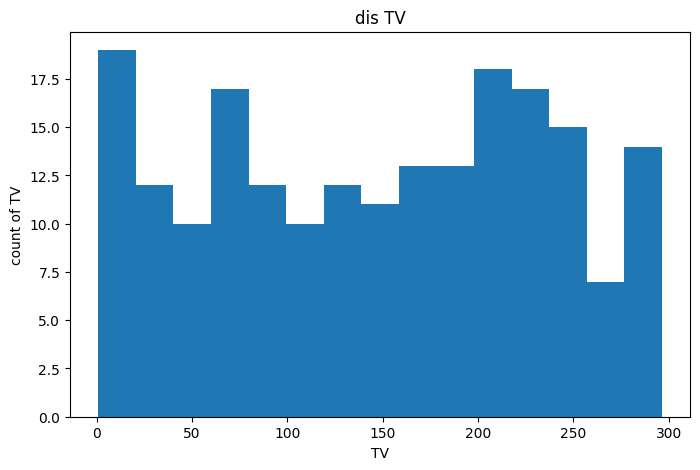

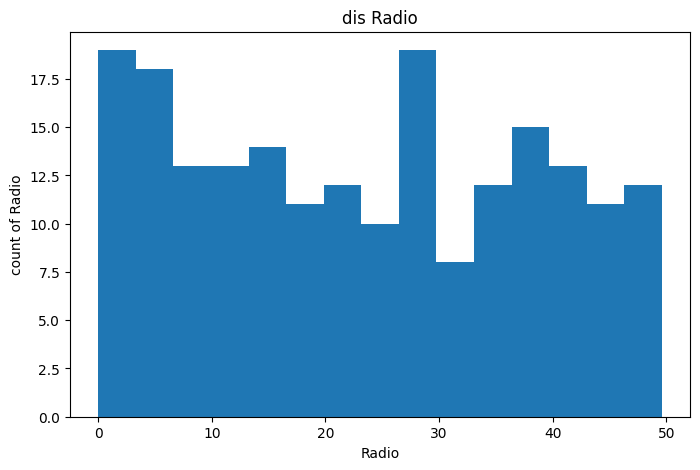

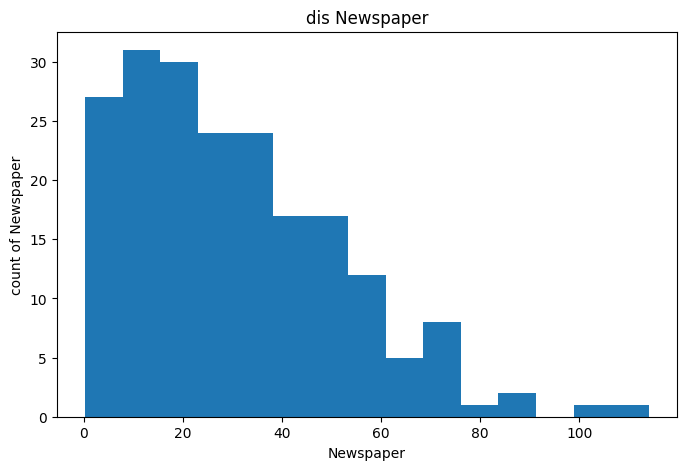

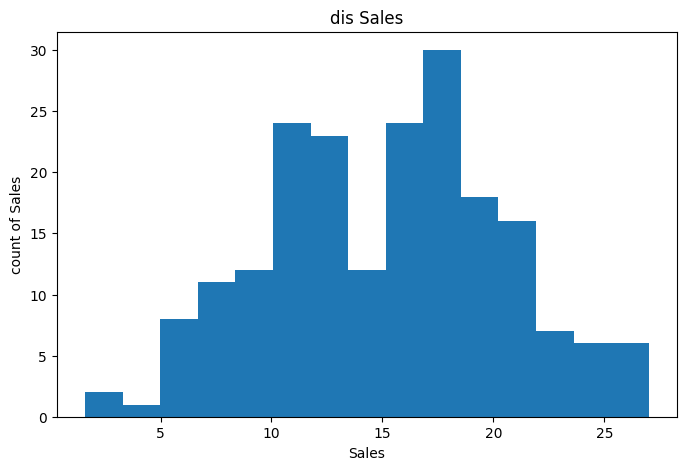

In [184]:
for col in df.columns.values:
    plt.figure(figsize=(8,5))
    plt.hist(df[col],bins=15)
    plt.title('dis '+col)
    plt.xlabel(col)
    plt.ylabel('count of '+ col)
    plt.show()
    

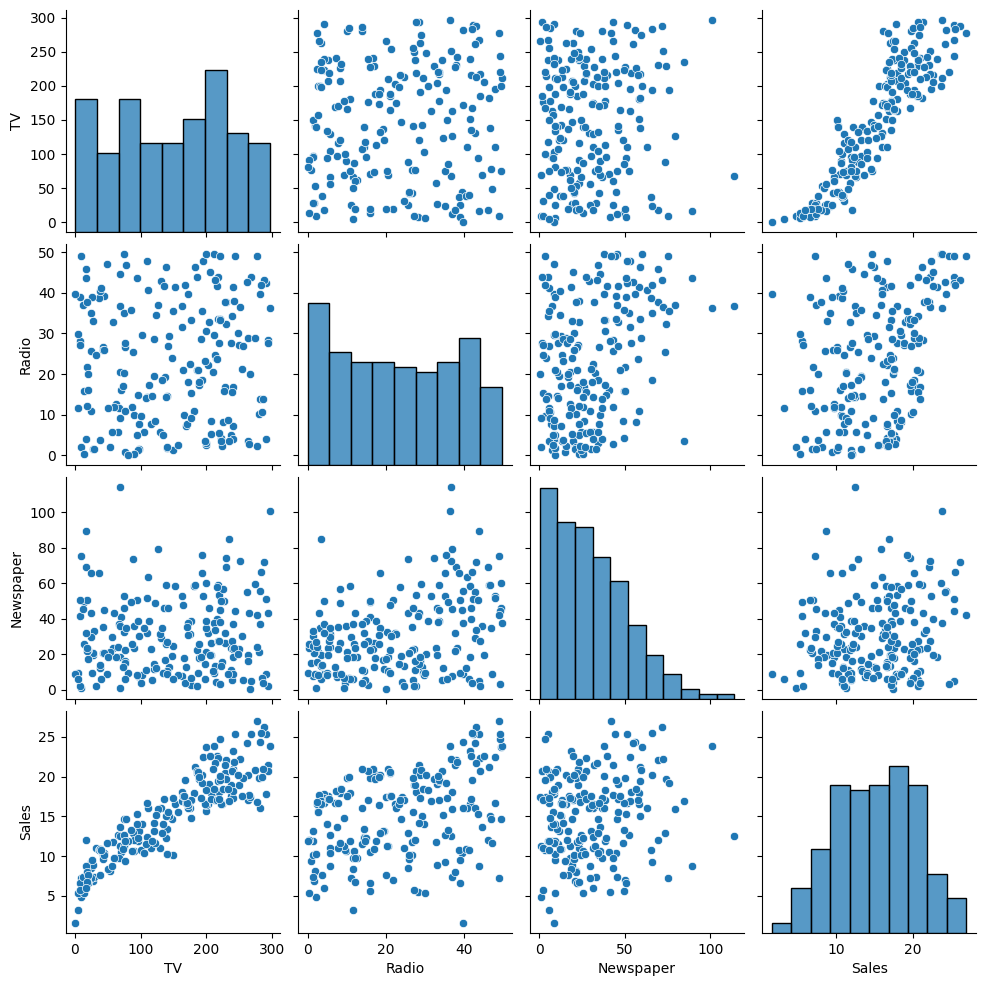

In [185]:
sns.pairplot(df)
plt.show()

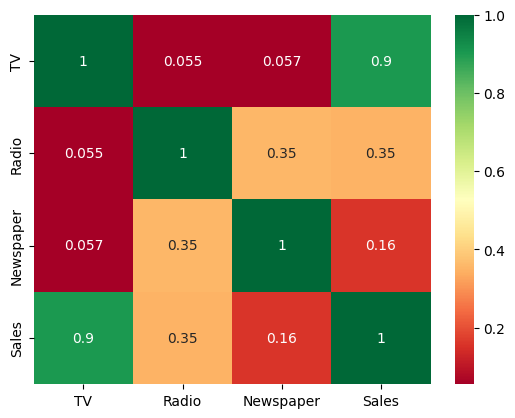

In [186]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

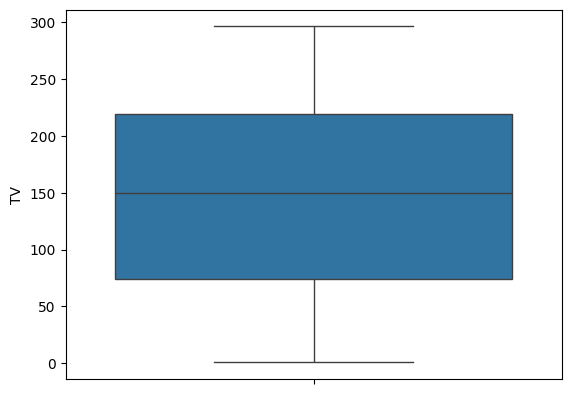

In [187]:
sns.boxplot(df['TV'])
plt.show()

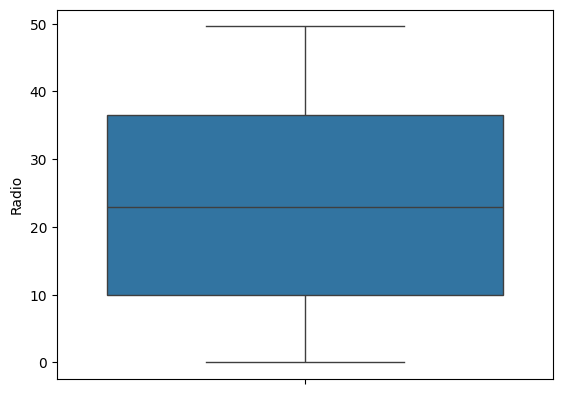

In [188]:
sns.boxplot(df['Radio'])
plt.show()

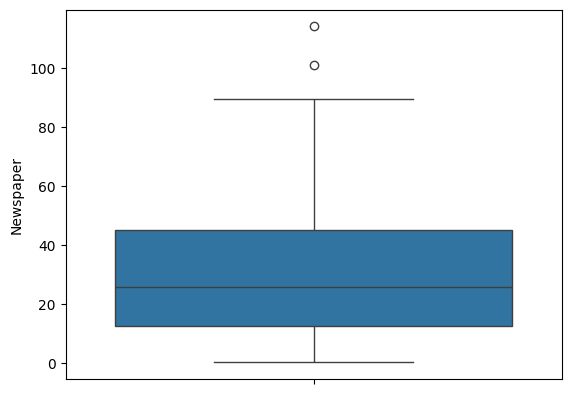

In [189]:
sns.boxplot(df['Newspaper'])
plt.show()

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error ,r2_score as score

In [196]:
models={'LinearRegression':LinearRegression(),
       'DecisionTreeRegressor':DecisionTreeRegressor(),
        'KNeighborsRegressor':KNeighborsRegressor(n_neighbors=5),
          'RandomForestRegressor':RandomForestRegressor(n_estimators=100,random_state=60),
            'GradientBoostingRegressor':GradientBoostingRegressor(n_estimators=100,random_state=60)}

In [197]:
x=df.drop('Sales',axis=1)
y=df['Sales']

In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [199]:
lr=LinearRegression()
lr.fit(x_train,y_train)
h=lr.predict(x_test)
print(r2_score(y_test,h))


0.9091484341849799


In [222]:
model_name=[]
accuracy=[]
for name,model in models.items():
    print('the name of the model is ',name)
    model_name.append(name)
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    print(f'the accuracy is {score(y_test,yhat)*100} %')
    accuracy.append(score(y_test,yhat)*100)
    print(f'mean_squared_error {mean_squared_error(y_test,yhat)}')
    print('\n')
    

the name of the model is  LinearRegression
the accuracy is 90.914843418498 %
mean_squared_error 2.541624036229148


the name of the model is  DecisionTreeRegressor
the accuracy is 89.360954261278 %
mean_squared_error 2.9763333333333333


the name of the model is  KNeighborsRegressor
the accuracy is 88.31518455985997 %
mean_squared_error 3.2688933333333337


the name of the model is  RandomForestRegressor
the accuracy is 94.24714345970948 %
mean_squared_error 1.6093942166666677


the name of the model is  GradientBoostingRegressor
the accuracy is 93.61067093690208 %
mean_squared_error 1.7874510115996667




In [224]:
df_model=pd.DataFrame({'Models':model_name,
                       'Accuracy':accuracy   })
df_model.head()

,Models,Accuracy
0,LinearRegression,90.914843
1,DecisionTreeRegressor,89.360954
2,KNeighborsRegressor,88.315185
3,RandomForestRegressor,94.247143
4,GradientBoostingRegressor,93.610671
